# Telco Customer Churn Analysis

**Objective:** Analyze customer churn data to uncover trends, identify key drivers, and provide actionable business insights.

**Tools Used:** Python, pandas, Jupyter Notebook

---

## Step 1: Load the Data


In [1]:
import pandas as pd

# Load the Excel file
excel_file = pd.ExcelFile("Telco_customer_churn.xlsx")
df = excel_file.parse("Telco_Churn")

# Preview the data
df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


## Step 2: Missing Values Check

This step identifies any columns with missing or null values that may require cleaning or further attention.


In [2]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

## Step 3: Inspect and Fix Data Types

This step ensures that each column has the correct data type for analysis.

- `Total Charges` should be numeric, but is currently stored as an object.  
- `Senior Citizen` is also an object and will be converted to an integer (0 = No, 1 = Yes).

In [3]:
df.dtypes


CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

## Step 4: Fix Data Types

Two columns require conversion:

- `Total Charges` is stored as an object (likely due to empty or non-numeric entries) and needs to be converted to float.
- `Senior Citizen` is stored as an object with "Yes"/"No" values and will be mapped to integers (1 = Yes, 0 = No).

# Convert 'Total Charges' to float (non-numeric values will become NaN)
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Map 'Senior Citizen' from 'Yes'/'No' to 1/0
df['Senior Citizen'] = df['Senior Citizen'].map({'Yes': 1, 'No': 0})


In [6]:
# Confirm the data types were updated
df.dtypes[['Total Charges', 'Senior Citizen']]

# Check how many Total Charges values are now NaN (optional)
df['Total Charges'].isnull().sum()


11

## Step 5: Handle Missing `Total Charges` Values

The conversion process resulted in 11 missing values in the `Total Charges` column. These entries likely belong to new customers with no billing history.

To maintain data integrity, these rows will be removed from the dataset.


In [7]:
# Drop rows where Total Charges is NaN
df = df[df['Total Charges'].notnull()]


## Step 6: Churn Distribution Overview

The `Churn Label` column indicates whether a customer has churned (`Yes`) or not (`No`). Understanding the churn rate is a key first step in evaluating overall customer retention.

We’ll calculate the count and percentage of churned vs. retained customers.


In [8]:
# Count of churned vs. retained customers
churn_counts = df['Churn Label'].value_counts()
churn_percent = df['Churn Label'].value_counts(normalize=True) * 100

print("Churn Counts:\n", churn_counts)
print("\nChurn Percentages:\n", churn_percent.round(2))


Churn Counts:
 Churn Label
No     5163
Yes    1869
Name: count, dtype: int64

Churn Percentages:
 Churn Label
No     73.42
Yes    26.58
Name: proportion, dtype: float64


## Step 7: Churn by Contract Type

This analysis explores how churn varies by customer contract type (Month-to-month, One year, Two year). Customers on flexible contracts are often more likely to churn due to fewer switching barriers.


In [ ]:
# Create a crosstab of churn by contract type
contract_churn = pd.crosstab(df['Contract'], df['Churn Label'], normalize='index') * 100
contract_churn = contract_churn.round(1)

# Display churn percentages by contract type
contract_churn


## Step 8: Visualize Churn by Contract Type

The chart below shows the percentage of customers who churned under each contract type. The data confirms that customers with month-to-month contracts churn at a significantly higher rate compared to those with one- or two-year agreements.


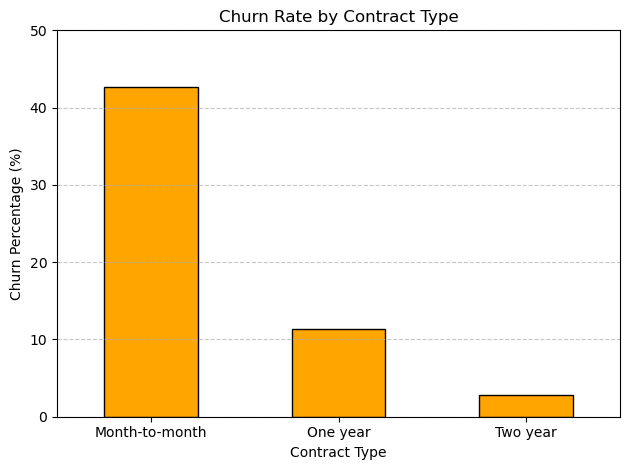

In [20]:
import matplotlib.pyplot as plt

# Plot the churn percentage for 'Yes' only
contract_churn['Yes'].plot(kind='bar', color='orange', edgecolor='black')

plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Percentage (%)')
plt.xlabel('Contract Type')
plt.ylim(0, 50)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## Step 9: Churn by Payment Method

This analysis examines how churn varies by payment method. Electronic check users are often more likely to churn, which may reflect lower engagement or lack of autopay incentives.


In [21]:
# Churn percentage by payment method
payment_churn = pd.crosstab(df['Payment Method'], df['Churn Label'], normalize='index') * 100
payment_churn = payment_churn.round(1)

# Show results
payment_churn


Churn Label,No,Yes
Payment Method,,
Bank transfer (automatic),83.3,16.7
Credit card (automatic),84.7,15.3
Electronic check,54.7,45.3
Mailed check,80.8,19.2


## Step 10: Visualize Churn by Payment Method

Customers who pay by electronic check churn at the highest rate (45.3%), while those using automated methods like credit card or bank transfer have significantly lower churn. This suggests that offering or incentivizing autopay could help reduce customer loss.


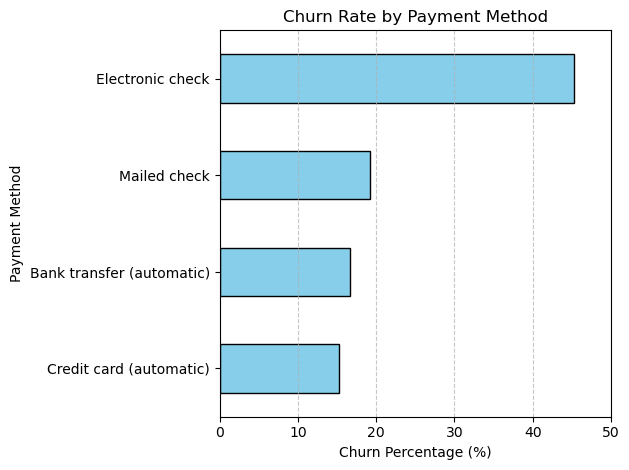

In [22]:
# Plot churn % (Yes) by payment method
payment_churn['Yes'].sort_values().plot(kind='barh', color='skyblue', edgecolor='black')

plt.title('Churn Rate by Payment Method')
plt.xlabel('Churn Percentage (%)')
plt.ylabel('Payment Method')
plt.xlim(0, 50)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## Step 11: Churn by Senior Citizen Status

This analysis explores whether senior citizens are more likely to churn compared to younger customers. Understanding age-related behavior can help tailor communication and support strategies.


In [15]:
df['Senior'] = df['Senior Citizen'].map({0: 'Not Senior', 1: 'Senior'})

# Crosstab of churn by senior status
senior_churn = pd.crosstab(df['Senior'], df['Churn Label'], normalize='index') * 100
senior_churn = senior_churn.round(1)

senior_churn


Churn Label
Senior


In [16]:
df['Senior Citizen'].unique()


array([nan])

In [17]:
df['Senior Citizen'].value_counts(dropna=False)


Senior Citizen
NaN    7032
Name: count, dtype: int64

In [18]:
import pandas as pd

# Reload clean data
df = pd.read_excel("Telco_customer_churn.xlsx", sheet_name="Telco_Churn")


In [19]:
# Fix 'Total Charges' column
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Drop rows with missing Total Charges
df = df[df['Total Charges'].notnull()]

# Fix 'Senior Citizen' column
df['Senior Citizen'] = df['Senior Citizen'].map({'Yes': 1, 'No': 0})

# Create a labeled version for analysis
df['Senior'] = df['Senior Citizen'].apply(lambda x: 'Senior' if x == 1 else 'Not Senior')


In [23]:
df['Senior'].value_counts()

Senior
Not Senior    5890
Senior        1142
Name: count, dtype: int64

## Step 11: Churn by Senior Citizen Status (Visualization)

This chart shows the churn rate for senior citizens compared to non-senior customers. The goal is to determine whether age is a meaningful predictor of customer retention or loss.


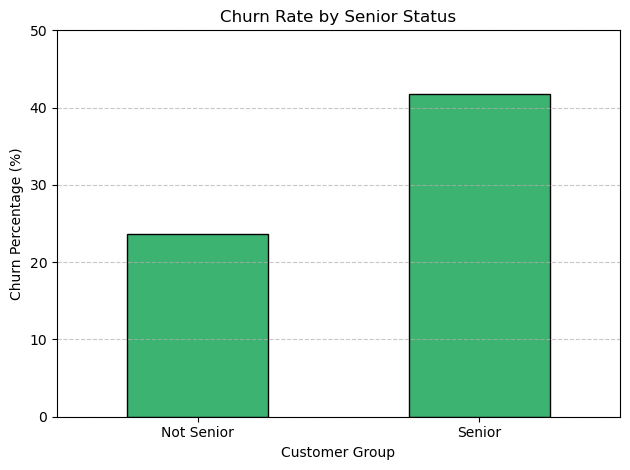

In [24]:
# Churn % by senior status
senior_churn = pd.crosstab(df['Senior'], df['Churn Label'], normalize='index') * 100
senior_churn = senior_churn.round(1)

# Bar chart
senior_churn['Yes'].plot(kind='bar', color='mediumseagreen', edgecolor='black')

plt.title('Churn Rate by Senior Status')
plt.ylabel('Churn Percentage (%)')
plt.xlabel('Customer Group')
plt.ylim(0, 50)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## Step 12: Tenure vs. Churn

This analysis explores the relationship between customer tenure (in months) and churn. The goal is to determine whether newer customers are more likely to churn compared to long-term subscribers.


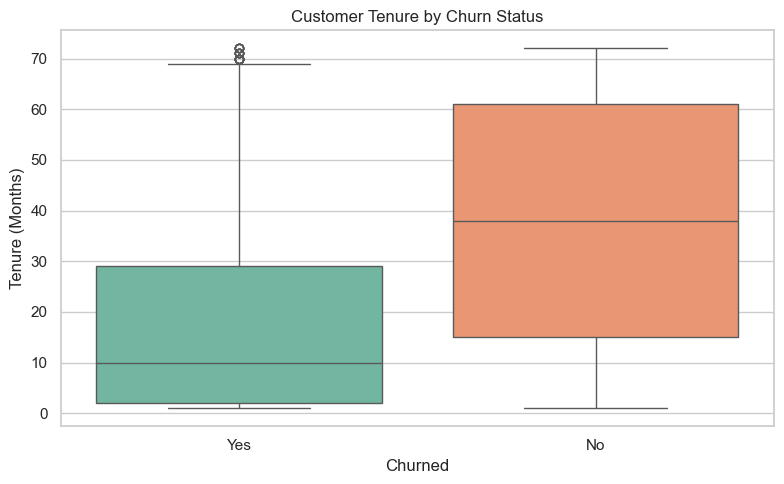

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn Label', y='Tenure Months', hue='Churn Label', palette='Set2', legend=False)

plt.title('Customer Tenure by Churn Status')
plt.xlabel('Churned')
plt.ylabel('Tenure (Months)')
plt.tight_layout()
plt.show()


### Insight:

The boxplot clearly shows that customers who churn tend to have significantly shorter tenures. This indicates that churn is highest during the early stages of the customer lifecycle.

**Business implication:**  
Retention efforts should focus on new customers, especially within their first few months of service.


## Step 13: Churn by Internet Service Type

This section explores whether the type of internet service (DSL, Fiber Optic, or None) impacts customer churn. Differences in churn rates can signal product satisfaction or service quality issues.


In [27]:
# Calculate churn % by internet service type
internet_churn = pd.crosstab(df['Internet Service'], df['Churn Label'], normalize='index') * 100
internet_churn = internet_churn.round(1)

internet_churn


Churn Label,No,Yes
Internet Service,,
DSL,81.0,19.0
Fiber optic,58.1,41.9
No,92.6,7.4


## Step 14: Visualize Churn by Internet Service

Customers with fiber optic internet have the highest churn rate (41.9%), which may indicate dissatisfaction with service performance, pricing, or reliability. DSL and no-service customers have significantly lower churn.


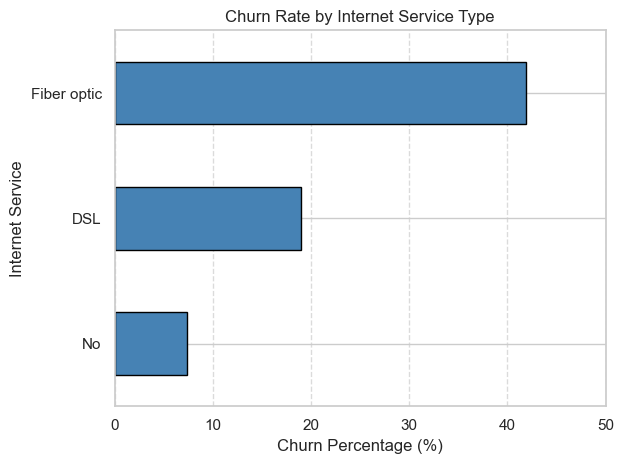

In [28]:
# Bar chart: churn % (Yes) by internet service type
internet_churn['Yes'].sort_values().plot(kind='barh', color='steelblue', edgecolor='black')

plt.title('Churn Rate by Internet Service Type')
plt.xlabel('Churn Percentage (%)')
plt.ylabel('Internet Service')
plt.xlim(0, 50)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## Step 15: Summary of Key Findings

After exploring customer churn across various features, several strong patterns emerged:

- **Overall churn rate** is approximately **27%**, indicating significant room for retention improvement.
- Customers with **month-to-month contracts** are far more likely to churn (42.7%) compared to one-year (11.3%) or two-year (2.8%) contract holders.
- Those who pay by **electronic check** churn at a rate of 45.3%, more than double the churn rate of customers using automatic payments.
- **Senior citizens** have a slightly higher churn rate than younger customers, though the difference is less dramatic.
- **New customers** (low tenure) churn significantly more than long-tenured customers.
- Customers with **fiber optic internet** churn at 41.9%, compared to just 19.0% for DSL and 7.4% for customers with no internet service.

---

## 📌 Step 16: Business Recommendations

Based on the analysis, the following actions are recommended:

1. **Incentivize Long-Term Contracts**  
   Offer discounts, bundles, or loyalty perks to encourage one- or two-year plans instead of month-to-month.

2. **Promote Autopay Options**  
   Reduce churn by encouraging customers to use credit card or bank transfer autopay instead of electronic check.

3. **Focus Retention on New Customers**  
   Develop targeted onboarding, first-bill experiences, or check-in touchpoints in the first 3–6 months.

4. **Investigate Fiber Optic Churn Causes**  
   Evaluate pricing, technical support, and satisfaction metrics for fiber optic users. This product group is churning aggressively.

5. **Senior Segment Engagement**  
   Consider personalized support or communication strategies to improve retention among older customers.

---

## 🏁 Step 17: Final Notes

This analysis provides a data-driven foundation to reduce churn and boost customer retention. Future steps could include:

- **Predictive modeling** using logistic regression or decision trees  
- **Customer segmentation** for marketing or support targeting  
- **Time series analysis** of churn trends over quarters or years

